In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!pip install tqdm

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [ ]:
image = cv2.imread('/content/IMG_6.JPG')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image.shape

(1200, 780)

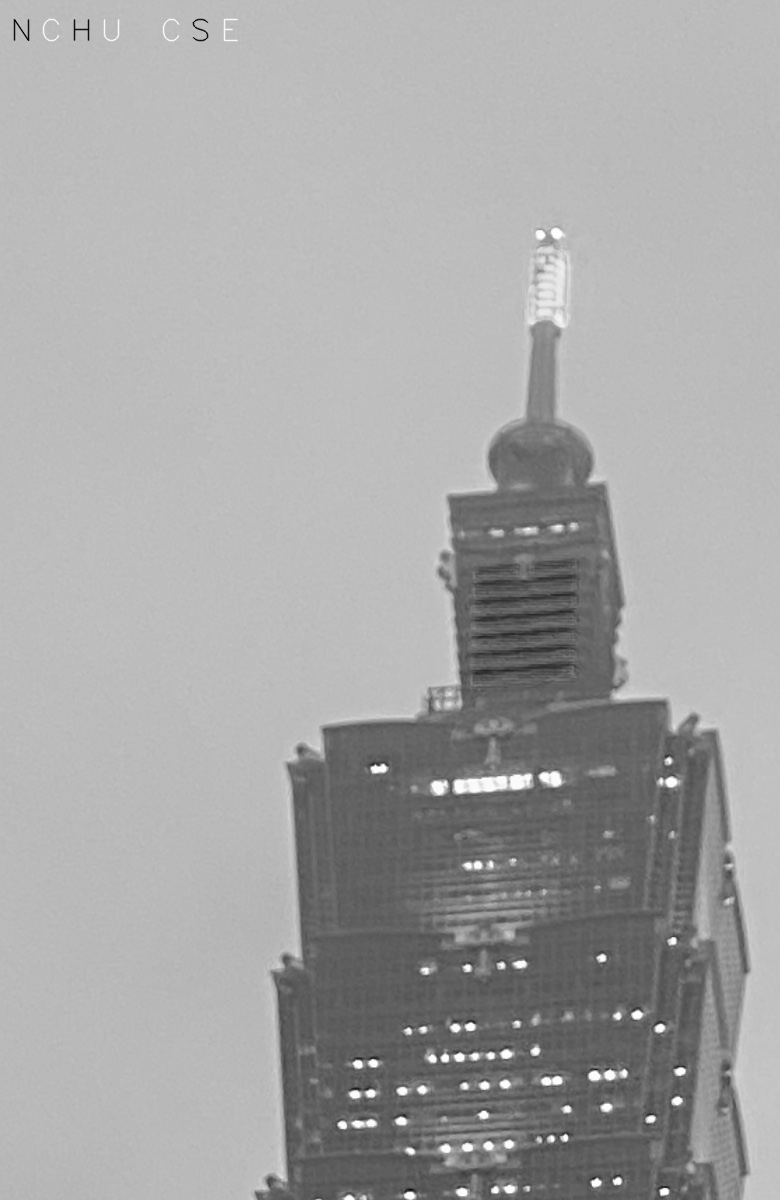

(1200, 780)

In [ ]:
def add_interlaced_text(image):
    # image = cv2.imread(image_path)
    if image is None:
        print("圖片讀取失敗，請檢查圖片")
        return None

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    thickness = 1
    x_start = 10
    y_start = 40
    letter_spacing = 30

    text = "NCHU CSE"
    colors = [(0, 0, 0), (255, 255, 255)]

    for i, letter in enumerate(text):
        color = colors[i % 2]
        cv2.putText(image, letter, (x_start + i * letter_spacing, y_start), font, font_scale, color, thickness, cv2.LINE_AA)

    cv2_imshow(image)
    return image

# add_NCHU_text
image_with_text = add_interlaced_text(gray_image)
image_with_text.shape

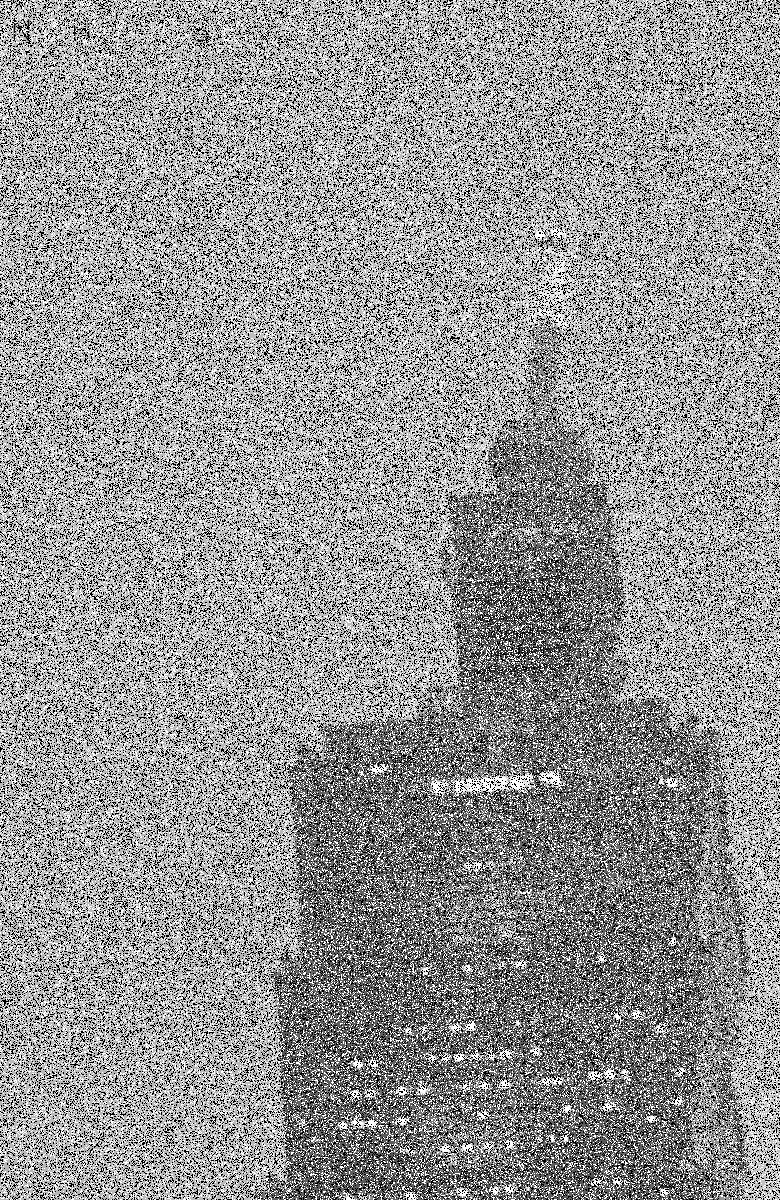

(1200, 780)

In [ ]:
def saltAndPepperNoise(image):
    if len(image.shape) != 2:
        raise ValueError("Image should be grayscale (2D array).")

    rows, cols = image.shape
    total_pixels = image.size
    noisy_image = np.copy(image)
    # 計算應添加鹽雜訊和胡椒雜訊的像素數
    num_salt = np.ceil(1/3 * image.size).astype(int)
    num_pepper = np.ceil(1/4 * image.size).astype(int)

    # 生成隨機座標
    salt_coords = (np.random.randint(0, rows, num_salt),
                   np.random.randint(0, cols, num_salt))
    noisy_image[salt_coords] = 255

    pepper_coords = (np.random.randint(0, rows, num_pepper),
                     np.random.randint(0, cols, num_pepper))
    noisy_image[pepper_coords] = 0
    # cv2_imshow(noisy_image)
    return noisy_image

# Impulse Noise
noisy_image = saltAndPepperNoise(image_with_text)
cv2_imshow(noisy_image)
noisy_image.shape

In [ ]:
print(gray_image[:10,:10])

[[186 186 185 185 186 186 187 187 188 188]
 [187 187 186 186 186 186 186 186 188 188]
 [188 188 188 187 187 186 186 185 188 188]
 [189 189 189 189 188 187 186 186 188 188]
 [190 190 190 189 189 188 187 187 188 188]
 [189 189 189 189 189 189 188 188 188 189]
 [189 189 189 188 188 188 188 188 189 188]
 [188 188 188 188 188 188 188 188 189 188]
 [188 188 188 188 188 188 188 187 187 188]
 [188 188 188 188 188 188 188 188 187 188]]


In [ ]:
print(noisy_image[:10,:10])

[[  0   0   0 185 186 186 187 187 255 255]
 [187 255 255   0   0 186 186   0   0   0]
 [  0 188 188   0 255 186 255 185 188 188]
 [189 189 255 189 188 255 255 186 188 255]
 [190   0 190   0   0 188 187 187   0 188]
 [255 189 189 189 255 255 188 188 188 255]
 [189 255 255 188   0 188   0 188 255 188]
 [188   0 188 188   0 255   0 188 189   0]
 [188 255 188   0 255 188 188   0 187   0]
 [255 188   0   0   0 188 188 188 255 188]]


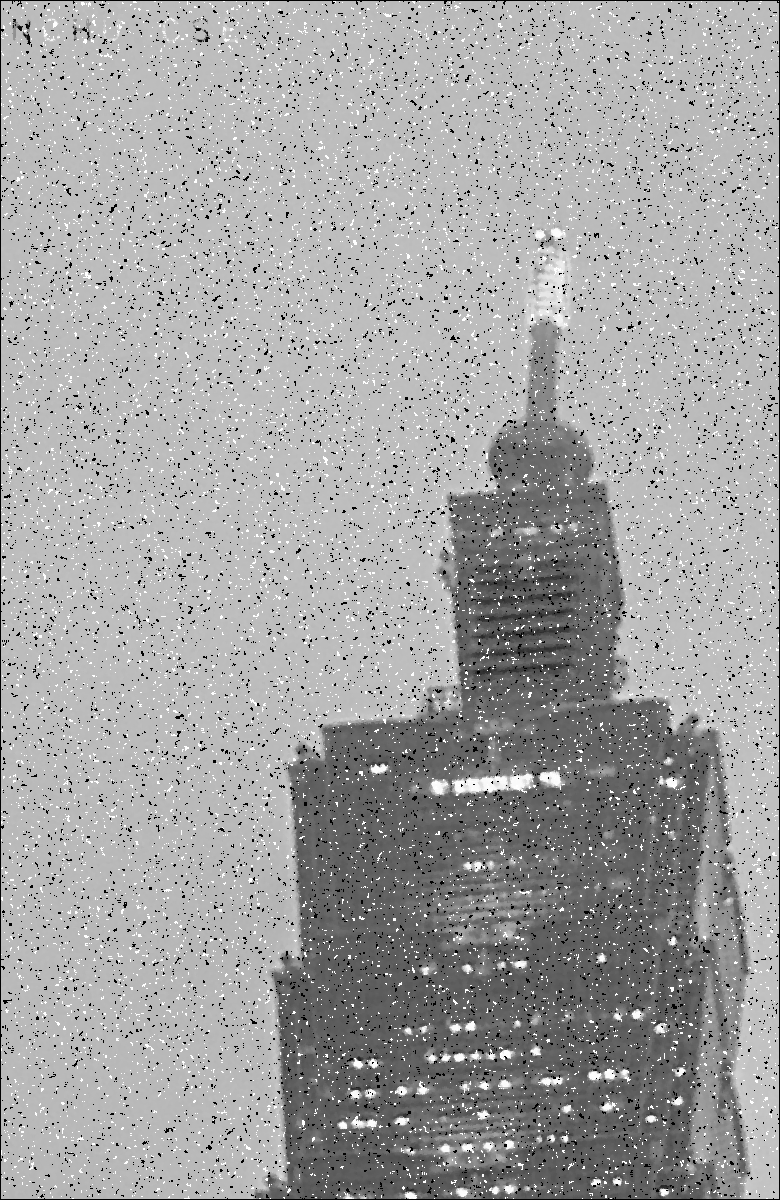

In [ ]:
def medianFilter(img_noisy):
    if len(img_noisy.shape) != 2:
        raise ValueError("Image should be grayscale (2D array).")

    m, n = img_noisy.shape
    img_new = np.zeros((m, n), dtype=np.uint8)

    for i in range(1, m-1):
        for j in range(1, n-1):
            temp = [
                img_noisy[i-1, j-1], img_noisy[i-1, j], img_noisy[i-1, j+1],
                img_noisy[i, j-1],   img_noisy[i, j],   img_noisy[i, j+1],
                img_noisy[i+1, j-1], img_noisy[i+1, j], img_noisy[i+1, j+1]
            ]

            temp = sorted(temp)
            img_new[i, j] = temp[4]

    cv2_imshow(img_new)
    # cv2.imwrite('medianFilter.jpg', img_new)
    return img_new

filtered_image1 = medianFilter(noisy_image)

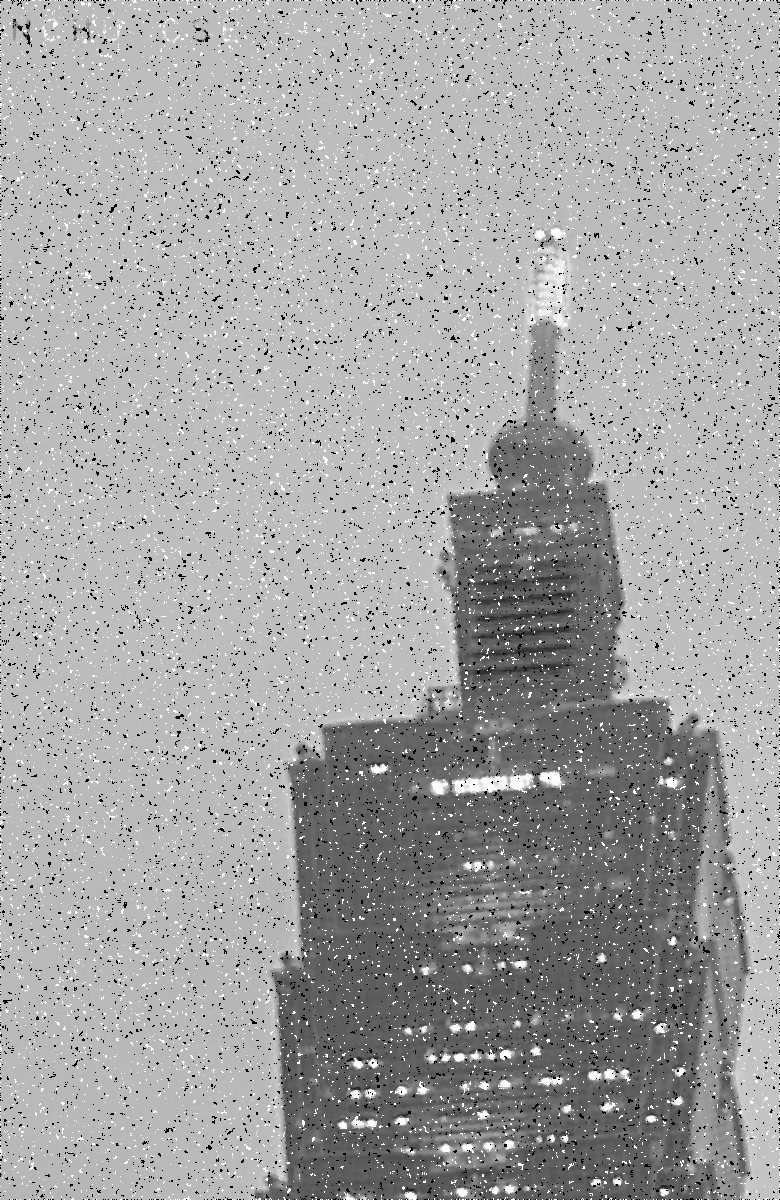

In [ ]:
def switching_median_filter(img_noisy, kernel_size, threshold=30):
    pad_width = kernel_size // 2
    padded_image = np.pad(img_noisy, pad_width=pad_width, mode='reflect')

    output_image = np.copy(img_noisy)
    m, n = img_noisy.shape

    for i in range(1, m-1):
        for j in range(1, n-1):
            temp = [
                img_noisy[i-1, j-1], img_noisy[i-1, j], img_noisy[i-1, j+1],
                img_noisy[i, j-1],   img_noisy[i, j],   img_noisy[i, j+1],
                img_noisy[i+1, j-1], img_noisy[i+1, j], img_noisy[i+1, j+1]
            ]
            temp = sorted(temp)
            # output_image[i, j] = temp[4]

            if np.abs(int(img_noisy[i, j]) - int(temp[4])) > threshold:
                output_image[i, j] = temp[4]

    cv2_imshow(output_image)
    return output_image

filtered_image2 = switching_median_filter(noisy_image, kernel_size=3)


In [ ]:
def Psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    # 假設圖像的最大像素值是255
    return 10 * np.log10((255.0 ** 2) / mse)

# 計算 PSNR
print('Median Filter PSNR:', round(Psnr(gray_image, filtered_image1), 2))
print('Switching Median Filter PSNR:', round(Psnr(gray_image, filtered_image2), 2))
print('PSNR between filter1 and filter2:', round(Psnr(filtered_image1, filtered_image2), 2))

Median Filter PSNR: 37.84
Switching Median Filter PSNR: 38.84
PSNR between filter1 and filter2: 44.53


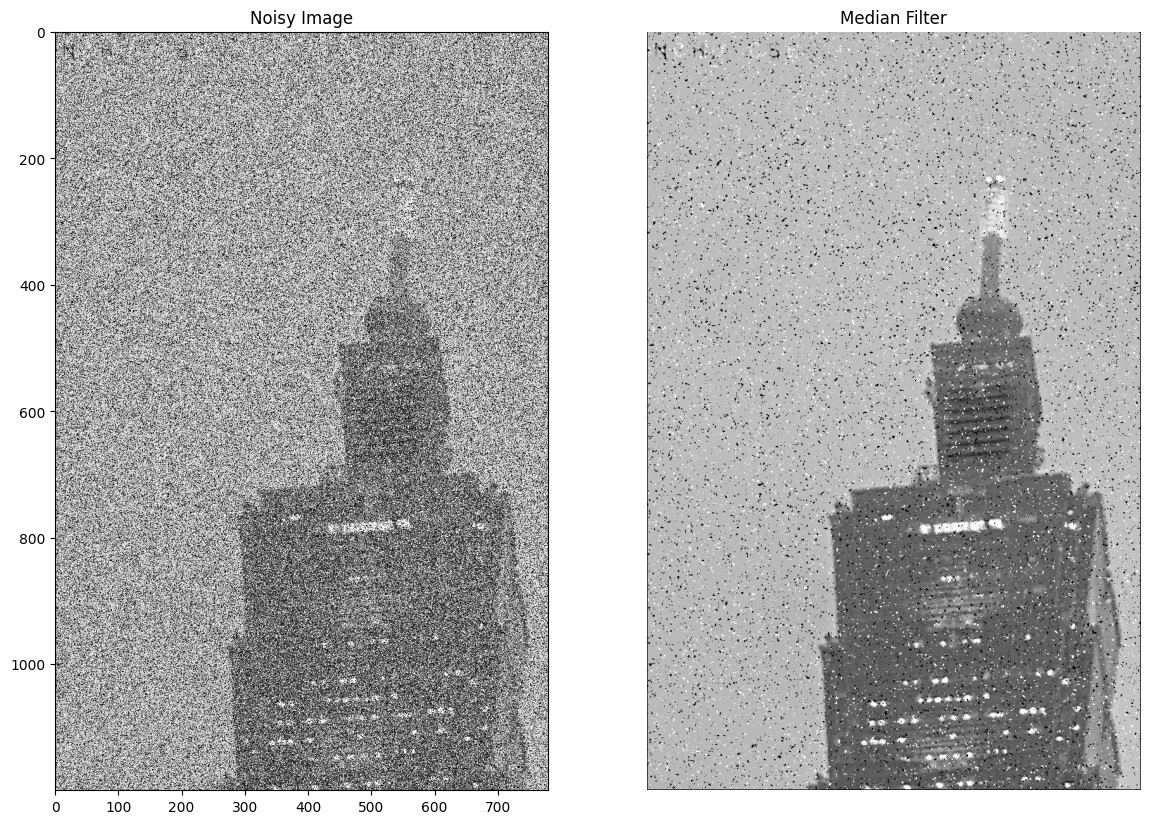

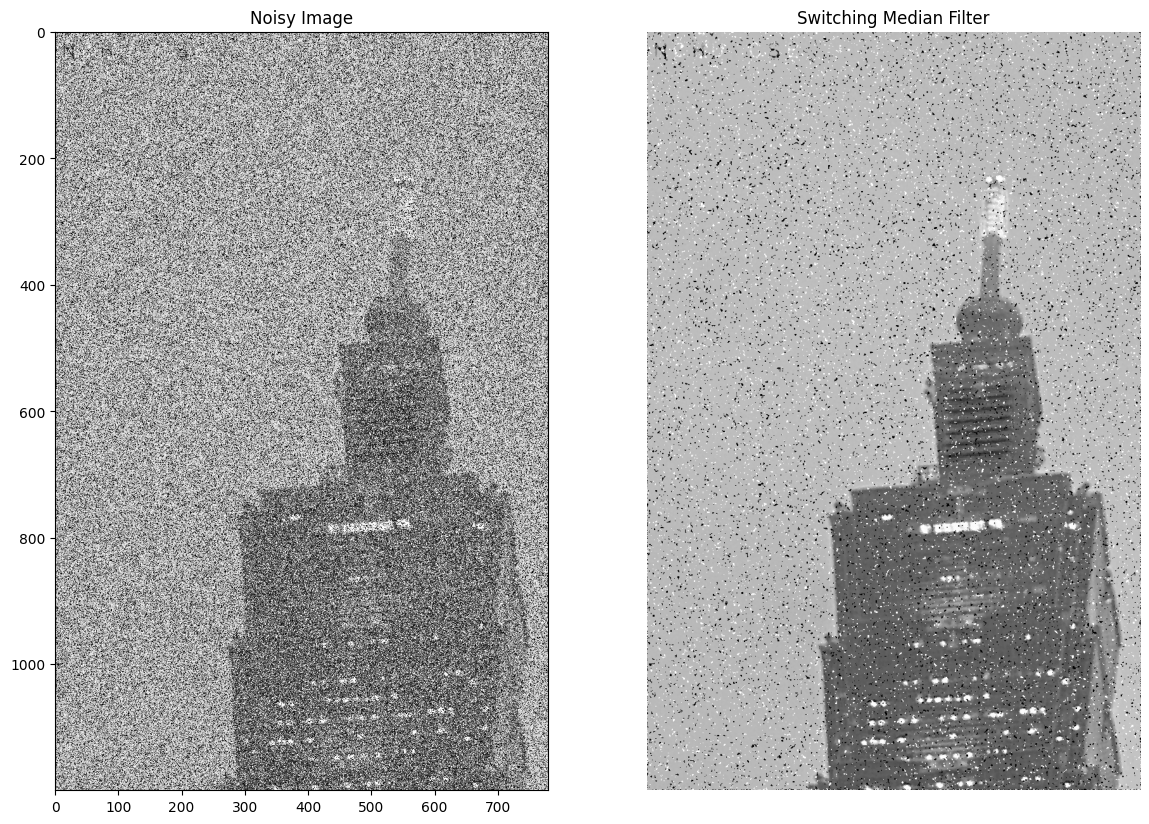

In [ ]:
plt.figure(figsize=(14, 12))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
# 顯示 Sobel 結果
plt.subplot(1, 2, 2)
plt.imshow(filtered_image1, cmap='gray')
plt.title('Median Filter')
plt.show()

plt.figure(figsize=(14, 12))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
# 顯示 Sobel 結果
plt.subplot(1, 2, 2)
plt.imshow(filtered_image2, cmap='gray')
plt.title('Switching Median Filter')
plt.show()

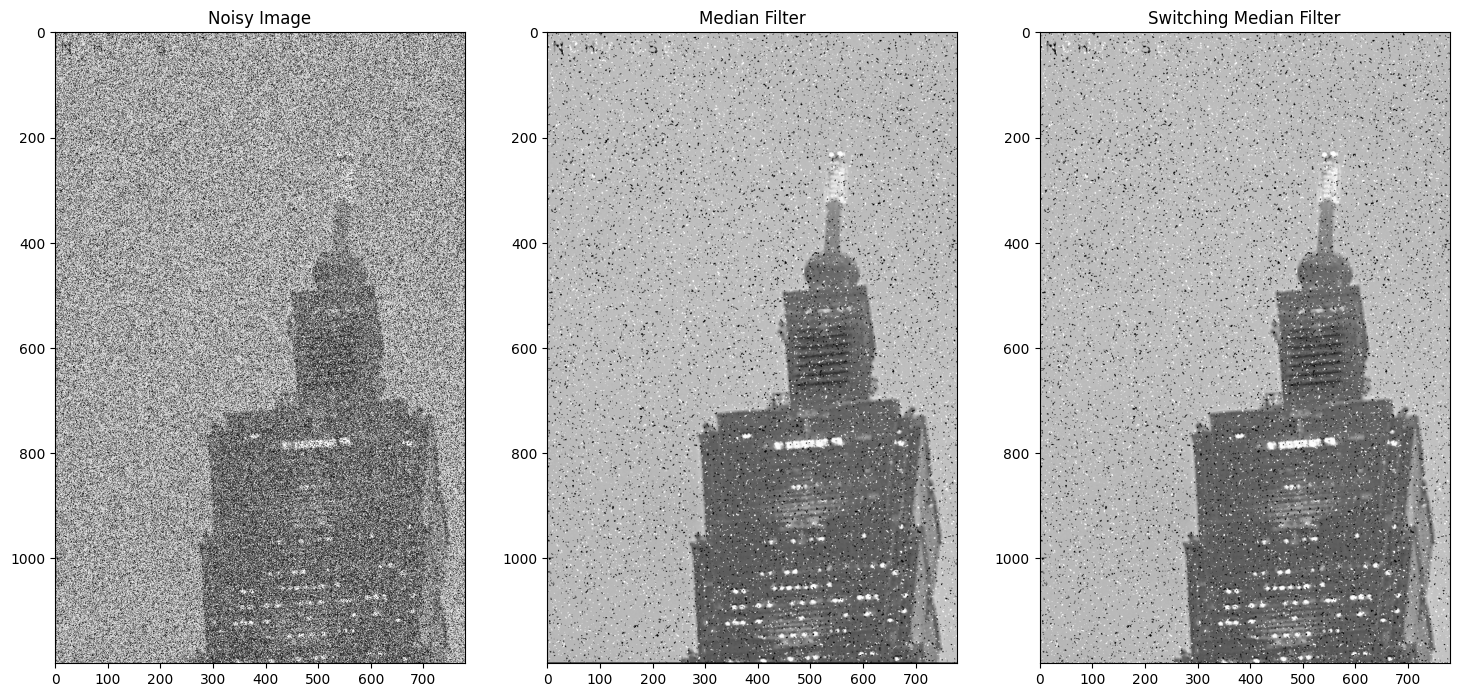

In [ ]:
plt.figure(figsize=(18, 9))

# 顯示灰度圖像
plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

# 顯示一階微分結果
plt.subplot(1, 3, 2)
plt.imshow(filtered_image1, cmap='gray')
plt.title('Median Filter')

# 顯示二階微分結果
plt.subplot(1, 3, 3)
plt.imshow(filtered_image2, cmap='gray')
plt.title('Switching Median Filter')
plt.show()